## 00. 기본 세팅

In [18]:

#데이터 전처리를 위한 세팅
import pandas as pd
import numpy as np
import random

#데이터 시각화 진행
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 01. 데이터셋 불러오기

In [20]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#train dataset과 test dataset을 합쳐놓은 df 생성
df = [df_train, df_test]

### 1) 데이터 변수 설명

 - 'PassengerId' - 승객고유번호, 
 - 'Survived' - 생존 여부 : 0(사망) / 1(생존)
 - 'Pclass' - 객실등급 : 1, 2, 3(낮을 수록 좋은 객실)
 - 'Name' - 이름
 - 'Sex' - 성별
 - 'Age' - 나이
 - 'SibSp' - 동행한 형제자매, 배우자의 수
 - 'Parch' - 동반한 부모 또는 자식의 수
 - 'Ticket' - 티켓의 고유번호
 - 'Fare' - 요금
 - 'Cabin' - 객실 번호
 - 'Embarked' - 승선 장소(C : Cherbourf / Q : Queenstown / S : Southampton)  

### 2) df_train와 df_test 정보 확인 

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


 - df_test의 경우 survived컬럼이 없으며 우리가 예측해 볼 것임

## 02. 데이터 분석

In [26]:
# describe() - 수치형(int, float 변수) 데이터에 대한 통계
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - df_train의 data수 : 891(age의 경우 결측치가 존재)
 - 훈련용 데이터셋에서의 평균 생존율 : 38.38%
 

In [27]:
# describe(include = ['O']) - object 변수 데이터에 대한 통계
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vanden Steen, Mr. Leo Peter",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


 - df_train의 남성 수 : 577명 / 여성 수 : 314
 - 가장 많은 탑승객을 태운 지역 : Southampton (644명)

### train data에서 Pclass에 따른 생존율 비교 및 데이터 시각화

In [49]:
df_ps = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)
df_ps
#객실 등급이 높을 수록 생존율 증가

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


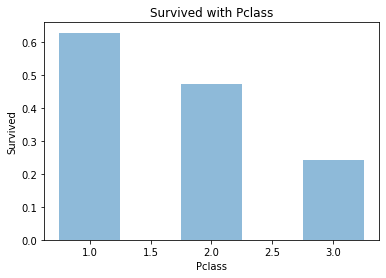

In [65]:
df_ps['Pclass']

plt.bar(df_ps['Pclass'], df_ps['Survived'], alpha = 0.5, width = 0.5)
plt.title('Survived with Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

### train data에서 Sex에 따른 생존율 비교 및 데이터시각화

In [57]:
df_ss = df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
df_ss
#여성의 생존율이 남성보다 높음

,Sex,Survived
0,female,0.742038
1,male,0.188908


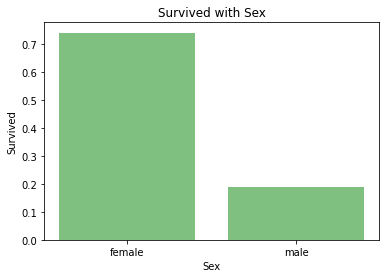

In [70]:
plt.bar(df_ss['Sex'], df_ss['Survived'], color = 'green', alpha = 0.5)
plt.title('Survived with Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.xticks(index, label)
plt.show()

### train data에서 동승자(형제, 배우자) 수에 따른 생존율 비교

In [77]:
df_sib_sur = df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by = 'SibSp', ascending = True)
df_sib_sur
#동행인이 많을 수록 생존율 낮음

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


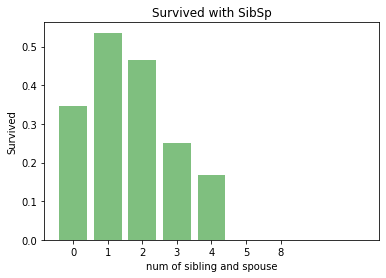

In [78]:
label = df_sib_sur['SibSp']
index = np.arange(len(label))

plt.bar(df_sib_sur['SibSp'], df_sib_sur['Survived'], color = 'green', alpha = 0.5)
plt.title('Survived with SibSp')
plt.xlabel('num of sibling and spouse')
plt.ylabel('Survived')
plt.xticks(index, label)
plt.show()

### train data에서 동승자(부모, 자식) 수에 따른 생존율 비교

In [81]:
df_par_sur = df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by = 'Parch')
df_par_sur
#동행인이 많은 경우 생존율이 낮음(3까지는 생존율이 높은 경향을 보임)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


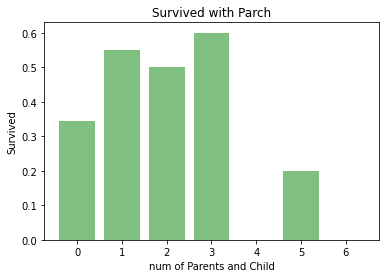

In [83]:
label = df_par_sur['Parch']
index = np.arange(len(label))

plt.bar(df_par_sur['Parch'], df_par_sur['Survived'], color = 'green', alpha = 0.5)
plt.title('Survived with Parch')
plt.xlabel('num of Parents and Child')
plt.ylabel('Survived')
plt.xticks(index, label)
plt.show()

### train data에서 연령대에 따른 생존율

In [85]:
df_age_sur = df_train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Age')
df_age_sur

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


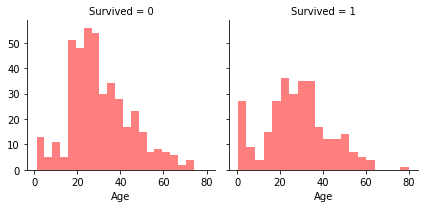

In [94]:
# FacetGrid를 통한 생존 여부로 두개의 그래프 그리기

# 생존여부를 col로 나눈다
grid = sns.FacetGrid(df_train, col = 'Survived')

# 연령대가 다양하므로 히스토그램을 이용해서 시각화 진행
# bin은 30으로 지정
grid.map(plt.hist, 'Age', bins=20, color = 'red', alpha = 0.5)


 - 10세 이하의 영유아의 경우 생존자 수가 사망자 수보다 많다

### train data에서 Pclass와 Survived에 따른 연령 분포

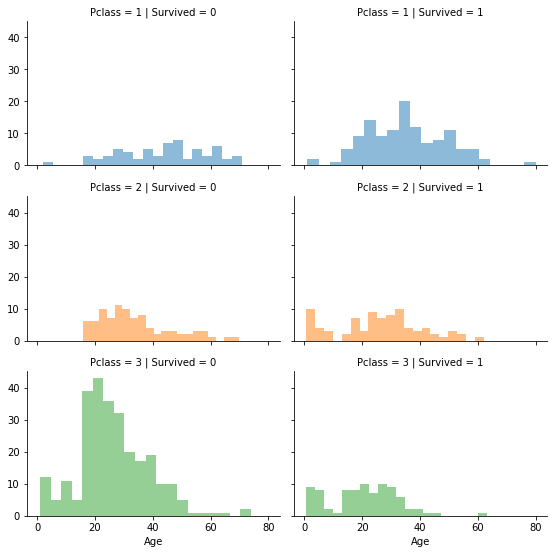

In [93]:
grid = sns.FacetGrid(df_train, col = 'Survived', row = 'Pclass', hue = 'Pclass', height = 2.6, aspect = 1.5)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)

### train data에서 Embarked와 Sex에 따른 생존자 수

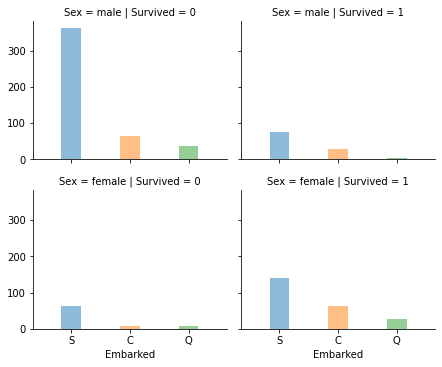

In [106]:
grid = sns.FacetGrid(df_train, col = 'Survived', row = 'Sex', hue = 'Embarked', height=2.6, aspect=1.2)
grid.map(plt.hist, 'Embarked', bins = 3, alpha = 0.5)

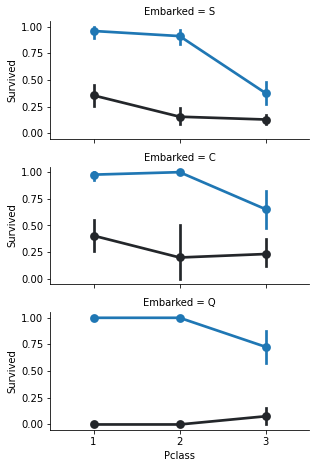

In [111]:
grid = sns.FacetGrid(df_train, row = 'Embarked', height = 2.2, aspect = 2)

#grid.map(그래프형태, x축, y축, 색상, x축 순서, 색상순서)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1,2,3],  hue_order = ['male', 'female'] )